# ***PS3***

In [30]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random as rand
from PIL import Image
from scipy.ndimage import rotate
import math
import time

In [2]:
# grab the data
filepaths = {
    "x_train": "./trainX.txt",
    "y_train": "./trainY.txt",
    "x_test": "./testX.txt",
    "y_test": "./testY.txt"
}
x_train = pd.read_csv(filepaths["x_train"])
y_train = pd.read_csv(filepaths["y_train"])
x_test = pd.read_csv(filepaths["x_test"])
y_test = pd.read_csv(filepaths["y_test"])

print(x_train.shape)

(470, 784)


(784,)
(28, 28)


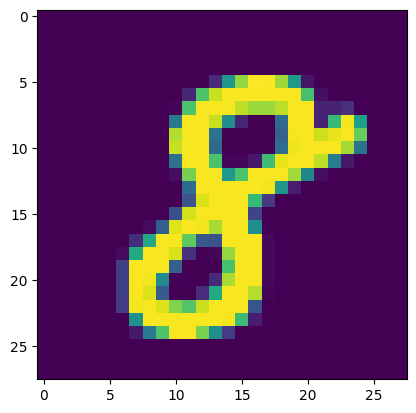

In [3]:
test = x_train.iloc[300, :].to_numpy()
test2 = test.reshape(28, 28)
print(test.shape)
print(test2.shape)
plt.imshow(test2)

## 1) **Bayesian Logistic Regression for Image Classification**

In [76]:
# create bayesian logistic regression class object
class BayesianLogisticRegression:

  # member variables
  sigma = 1

  # constructor
  def __init__(self, sigma = 1):
    self.sigma = sigma
    self.beta = []

  # fitting
  def fit(self, X, Y, params = {"epsilon": .1, "learning_rate": .0001}, X_test = [], Y_test = []):

    # add bias to X data
    X_bias = np.hstack((np.ones(shape = (X.shape[0], 1)), X))
    X_bias_shape = X_bias.shape
    loss = []

    # randomly initialize beta
    self.beta = np.random.normal(0, self.sigma, size = (X_bias_shape[1], 1))

    likelihood_grad_norm = 100

    # calculate the gradient
    while likelihood_grad_norm > params["epsilon"]:
      lin_comb = np.exp(-X_bias @ self.beta) # n x 1

      grad = np.sum(((1 - Y) - (lin_comb/ (1 + lin_comb))) * X_bias, axis = 0)
      regularization = self.beta/(self.sigma ** 2)

      likelihood_grad = grad[:, np.newaxis] + regularization

      self.beta -= params["learning_rate"] * likelihood_grad

      likelihood_grad_norm = np.linalg.norm(likelihood_grad)

      y_pred = self.predict(X_test)
      loss.append(self.loss(y_pred, Y_test))

    return loss


  # loss function
  def loss(self, y_pred, y_true): # order does matter for classes
    # calculate loss
    m = y_pred.shape[0]

    num_correct = np.sum(abs(y_pred - y_true))

    return num_correct / m

  # prediction
  def predict(self, X):
    X_bias = np.hstack((np.ones(shape = (X.shape[0], 1)), X))
    X_bias_shape = X_bias.shape

    pred = 1 / (1 + np.exp(-X_bias @ self.beta))
    results = []

    for idx in range(pred.shape[0]):
      if pred[idx] > (1-pred[idx]):
        results.append(1)
      else:
        results.append(0)
    return np.array(results)[:, np.newaxis]


### d)

In [77]:
# extract only 1's and 0's
def extract_certain_values(X, Y, values):
  X = X.to_numpy()
  Y = Y.to_numpy()

  X_output = []
  Y_output = []

  for idx in range(X.shape[0]):
    if Y[idx] in values:
      X_output.append(X[idx, :])
      Y_output.append(Y[idx])

  return np.array(X_output), np.array(Y_output)

In [78]:
x_train_0_1, y_train_0_1 = extract_certain_values(x_train, y_train, values = [0, 1])
x_test_0_1, y_test_0_1 = extract_certain_values(x_test, y_test, values = [0, 1])

### e)

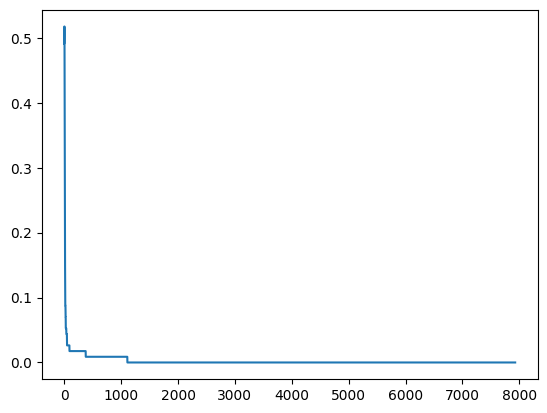

In [79]:
bayesian_model = BayesianLogisticRegression(sigma = 1)
params = {"epsilon": .01, "learning_rate": .001}
loss = bayesian_model.fit(X = x_train_0_1, Y = y_train_0_1, X_test = x_test_0_1, Y_test = y_test_0_1, params = params)

plt.plot(loss)
y_pred = bayesian_model.predict(x_test_0_1)

In [16]:
error_rate = bayesian_model.loss(y_pred = y_pred, y_true = y_test_0_1)
print(f"The error rate: {error_rate}")

The error rate: 0.0


### f)

In [17]:
bayesian_model_6_8 = BayesianLogisticRegression(sigma = .1)
x_train_6_8, y_train_6_8 = extract_certain_values(x_train, y_train, values = [6, 8])
x_test_6_8, y_test_6_8 = extract_certain_values(x_test, y_test, values = [6, 8])

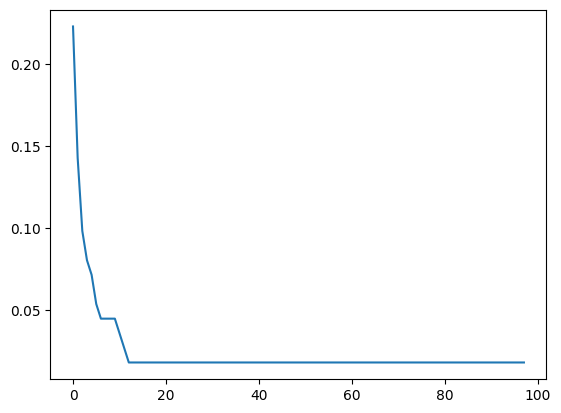

In [18]:
params = {
    "epsilon": .01,
    "learning_rate": .001
}

y_train_6_8[y_train_6_8 == 6] = 0
y_train_6_8[y_train_6_8 == 8] = 1
y_test_6_8[y_test_6_8 == 6] = 0
y_test_6_8[y_test_6_8 == 8] = 1

loss = bayesian_model_6_8.fit(X = x_train_6_8, Y = y_train_6_8, X_test = x_test_6_8, Y_test = y_test_6_8,
                              params = params)
y_pred = bayesian_model_6_8.predict(x_test_6_8)
error_rate = bayesian_model_6_8.loss(y_pred = y_pred, y_true = y_test_6_8)
plt.plot(loss)

In [19]:
print(f"The Error Rate: {error_rate}")

The Error Rate: 0.017857142857142856


## 2) **PCA**

In [27]:
# pca projection function for a given number of components
def pca_projection(dataset_x, components):
  pca = PCA(n_components = components)

  return pca.fit_transform(X = dataset_x)

# resulting projections
pca_projections_dict = {
    "10_pc_train": pca_projection(x_train_0_1, 10),
    "20_pc_train": pca_projection(x_train_0_1, 20),
    "30_pc_train": pca_projection(x_train_0_1, 30),
    "10_pc_test": pca_projection(x_test_0_1, 10),
    "20_pc_test": pca_projection(x_test_0_1, 20),
    "30_pc_test": pca_projection(x_test_0_1, 30)
}

params = {"epsilon": .01, "learning_rate": .001, "sigma": 1}

bayesian_network_PCA = BayesianLogisticRegression(sigma = params["sigma"])

In [37]:
# run with with pca
pca_run_results = []
for pc in ["10_pc_", "20_pc_", "30_pc_"]:
  start = time.time()
  bayesian_network_PCA = BayesianLogisticRegression(sigma = params["sigma"])
  loss = bayesian_network_PCA.fit(X = pca_projections_dict[pc + "train"],
                                   Y = y_train_0_1,
                                   X_test = pca_projections_dict[pc + "test"],
                                   Y_test = y_test_0_1,
                                   params = params)
  end = time.time()

  pca_run_results.append((loss[-1], end - start))

print(f"10 PC:\n\tAccuracy: {1 - pca_run_results[0][0]}\n\tElapsed Time: {pca_run_results[0][1]}s")
print(f"20 PC:\n\tAccuracy: {1 - pca_run_results[1][0]}\n\tElapsed Time: {pca_run_results[1][1]}s")
print(f"30 PC:\n\tAccuracy: {1 - pca_run_results[2][0]}\n\tElapsed Time: {pca_run_results[2][1]}s")

10 PC:
	Accuracy: 0.9912280701754386
	Elapsed Time: 3.161742687225342s
20 PC:
	Accuracy: 0.9912280701754386
	Elapsed Time: 1.9795033931732178s
30 PC:
	Accuracy: 0.9912280701754386
	Elapsed Time: 2.2426066398620605s


## 3) **Augmentation**

In [83]:
# function that augments the image
param = {
    "degree_min": -15,
    "degree_max": 15,
    "translate_min": -5,
    "translate_max": 5,
    "multiplier": 3
}


# function that augments the image
def augment_image(images, labels, param):
  # generate random values
  random_degree = rand.randrange(param["degree_min"], param["degree_max"] + 1)
  translation_x = rand.randrange(param["translate_min"], param["translate_max"] + 1)
  translation_y = rand.randrange(param["translate_min"], param["translate_max"] + 1)

  images_shape = images.shape
  images_copy = images.copy()
  labels_copy = labels.copy()
  # loop through each image and augment it

  for multiplier_value in range(param["multiplier"] - 1):
    for idx in range(images_shape[0]):
      # rotate and then translate
      img_np_array = images[idx, :].reshape(28, 28)
      rotated_img = rotate(img_np_array, random_degree)
      translate_img = np.roll(img_np_array, translation_x, axis = 1)
      transformed_img = np.roll(translate_img, translation_y, axis = 0)

      images_copy = np.append(images_copy, transformed_img.reshape(1, -1), axis = 0)
      labels_copy = np.append(labels_copy, labels[idx])

  return images_copy, labels_copy[:, np.newaxis]

In [84]:
for multiplier_val in [3, 5]:
  # set the parameters for the augmentation
  param = {
    "degree_min": -15,
    "degree_max": 15,
    "translate_min": -5,
    "translate_max": 5,
    "multiplier": multiplier_val
  }

  # for the model
  params = {"epsilon": .01, "learning_rate": .001, "sigma": 1}

  augmented_x_train_6_8, augmented_y_train_6_8 = augment_image(x_train_6_8, y_train_6_8, param)

  # print(y_train_6_8.shape)

  bayesian_network = BayesianLogisticRegression(sigma = 1)
  loss = bayesian_network.fit(X = augmented_x_train_6_8, Y = augmented_y_train_6_8, params = params, X_test = x_test_6_8, Y_test = y_test_6_8)

  print(f"Accuracy for {multiplier_val} times: {1 - loss[-1]}")


Accuracy for 3 times: 0.9821428571428571
Accuracy for 5 times: 0.9821428571428571


## **Sources**
scikit-learn.org

https://stackoverflow.com/questions/53171057/numpy-matrix-rotation-for-any-degrees

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html


